In [1]:
import numpy as np
import pandas as pd

import mido
import ast
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_57537/110015356.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
scores_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM_stimuli/stim_scripts/train_analysis/scores'
files = sorted(glob.glob(os.path.join(scores_dir,'*.csv')))

In [3]:
df_scores = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    df_scores = pd.concat([df_scores, df])

subjects = df_scores['subject'].unique()


In [4]:
def ave_score(score_df, period):
    means = []
    for subject in df_scores['subject'].unique():
        if period == 'pre':
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']<=82)]['score'])
        elif period == 'post':
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']>=82)]['score'])
        elif period == 'beginning1': 
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']<=10)]['score'])
        elif period == 'beginning2': 
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']>=82)& (df_scores['trial_number']<=92)]['score'])

        elif period == 'all':
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject)]['score'])
        else:
            print('Valid periods are pre, post, and all')
            
        means.append(mean_sub)

    return means

In [5]:
means_pre = ave_score(df_scores, 'pre')
means_post = ave_score(df_scores, 'post')
means_pre_10 = ave_score(df_scores, 'beginning1')

In [6]:
means_pre_10

[3.81,
 4.0,
 3.7399999999999998,
 3.3200000000000003,
 3.6700000000000004,
 3.6799999999999997,
 4.0,
 3.87,
 3.9799999999999995]

Text(0, 0.5, 'Mean score')

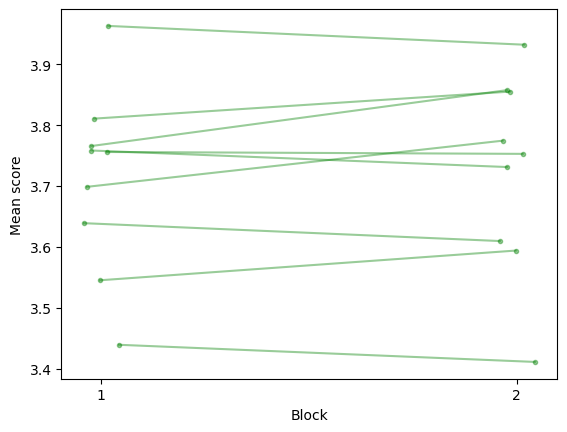

In [7]:
for i in range(len(means_pre)):
    jitter = np.random.uniform(-0.05,0.05)
    x = [1+jitter,2+jitter] 
    plt.plot(x, [means_pre[i], means_post[i]], marker = 'o',markersize = 3, color = 'green', alpha = 0.4)


#plt.scatter(x, [np.mean(means_pre), np.mean(means_post)], color = 'green')
plt.xticks([1,2])
plt.xlabel('Block')
plt.ylabel('Mean score')

In [9]:
"""#rolling ave over trials
smoothness = 15

plt.figure(figsize=(10,5))

k = 0.25

for subject in subjects:
    colour = [0.1, k, 0.6]
    k+=0.1
    for i in range(2):
        rolling_corr = df_scores[(df_scores['block']==i+1) & (df_scores['subject'] == subject)]['correct'].rolling(smoothness).mean()
        plt.plot(rolling_corr, label = subject, color = colour)


plt.xlabel("Trial")
plt.ylabel("Rolling average score over 10 trials")
   """

'#rolling ave over trials\nsmoothness = 15\n\nplt.figure(figsize=(10,5))\n\nk = 0.25\n\nfor subject in subjects:\n    colour = [0.1, k, 0.6]\n    k+=0.1\n    for i in range(2):\n        rolling_corr = df_scores[(df_scores[\'block\']==i+1) & (df_scores[\'subject\'] == subject)][\'correct\'].rolling(smoothness).mean()\n        plt.plot(rolling_corr, label = subject, color = colour)\n\n\nplt.xlabel("Trial")\nplt.ylabel("Rolling average score over 10 trials")\n   '

In [10]:
#scores sorted by difficulty

"""sub_colour = 0.1
for subject in subjects:
    for block in range(1,3):
        res_temp = df_scores[(df_scores['block']==block) & (df_scores['subject'] ==subject)]

        diff_score = []
        for i in range(1,5):
            diff = res_temp[res_temp['type'] == i]
            diff_score.append(np.mean(diff['correct']))
            #score = np.mean(diff['correct'])
            #plt.scatter(i, score, c = (0.5, 0.5, float(block)/5), cmap='blues')
        if block == 1:
            block_style = '--'
        elif block ==2:
            block_style = '-'
        plt.plot(np.arange(1, 5, 1), diff_score, c = (0.5, 0.5, sub_colour), marker = '.', linestyle = block_style, label = block)
    sub_colour +=0.2

plt.legend(loc = 'upper right', title = "Block")
plt.ylabel('Perfect response rate')
plt.xlabel('Number of different notes in melody')
plt.xticks(np.arange(1, 5, 1))"""

'sub_colour = 0.1\nfor subject in subjects:\n    for block in range(1,3):\n        res_temp = df_scores[(df_scores[\'block\']==block) & (df_scores[\'subject\'] ==subject)]\n\n        diff_score = []\n        for i in range(1,5):\n            diff = res_temp[res_temp[\'type\'] == i]\n            diff_score.append(np.mean(diff[\'correct\']))\n            #score = np.mean(diff[\'correct\'])\n            #plt.scatter(i, score, c = (0.5, 0.5, float(block)/5), cmap=\'blues\')\n        if block == 1:\n            block_style = \'--\'\n        elif block ==2:\n            block_style = \'-\'\n        plt.plot(np.arange(1, 5, 1), diff_score, c = (0.5, 0.5, sub_colour), marker = \'.\', linestyle = block_style, label = block)\n    sub_colour +=0.2\n\nplt.legend(loc = \'upper right\', title = "Block")\nplt.ylabel(\'Perfect response rate\')\nplt.xlabel(\'Number of different notes in melody\')\nplt.xticks(np.arange(1, 5, 1))'

In [11]:


# Initialize empty lists to store data
subjects = []
blocks = []
percent_corrects = []
types = []

# Loop through unique subjects and blocks
for subject in df_scores['subject'].unique():
    for block in range(1, 3):
        # Calculate percent correct for the subject and block
        for type in range(2,5):
         percent_correct = df_scores[(df_scores['subject'] == subject) & (df_scores['block'] == block) & (df_scores['type'] == type)]['correct'].mean()
         
         # Append data to lists
         subjects.append(subject)
         blocks.append(block)
         percent_corrects.append(percent_correct)
         types.append(type)

# Create DataFrame from lists
correct_df = pd.DataFrame({'subject': subjects, 'block': blocks, 'type': types, 'percent_correct': percent_corrects})


Text(0, 0.5, 'Rate of perfect responses')

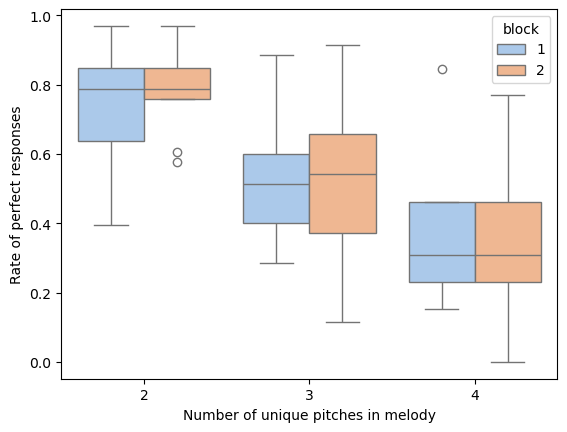

In [12]:

# Add individual data points
#sns.swarmplot(data=correct_df, x='type', y='percent_correct', hue='block', color='black', dodge=True)
# Create the boxplot
ax = sns.boxplot(data=correct_df, x='type', y='percent_correct', hue='block', palette='pastel')

# Set labels for x and y-axis
ax.set_xlabel('Number of unique pitches in melody')
ax.set_ylabel('Rate of perfect responses')


In [13]:
df_scores.head()

,trial_number,notes_vector,subject,target,correct,score,block,type
0,1,"[53, 59, 55, 57, 53, 55, 60, 60]",1,"[60, 60, 60, 60]",0,2.4,1,1
1,2,"[60, 60, 60, 60, 59, 58]",1,"[60, 60, 60, 59]",0,3.9,1,2
2,3,"[60, 60, 59, 59]",1,"[60, 60, 59, 59]",1,4.0,1,2
3,4,"[60, 59, 59, 60]",1,"[60, 59, 59, 60]",1,4.0,1,2
4,5,"[60, 59, 60, 59]",1,"[60, 59, 60, 59]",1,4.0,1,2


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_57537/1570782741.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  fig = sns.barplot(data=df_scores[df_scores['type'] != 1], x='type', y='score', hue='block', ci='sd', palette='pastel')


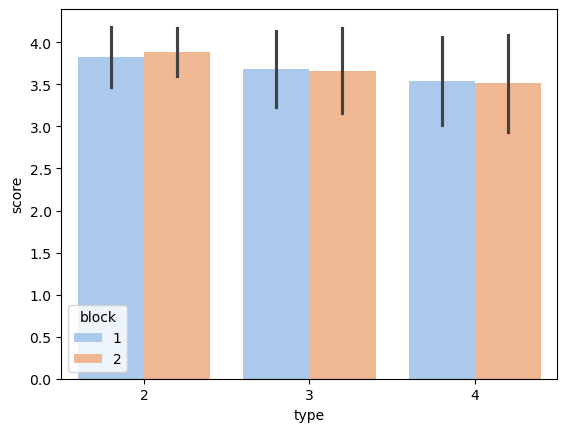

In [14]:

# Assuming df_scores is your DataFrame
# Adjust 'type', 'score', and 'block' accordingly
fig = sns.barplot(data=df_scores[df_scores['type'] != 1], x='type', y='score', hue='block', ci='sd', palette='pastel')



In [15]:
df_scores['subject']

0      1
1      1
2      1
3      1
4      1
      ..
159    9
160    9
161    9
162    9
163    9
Name: subject, Length: 1476, dtype: int64

In [16]:
df_fl = pd.DataFrame()
for subject in df_scores['subject'].unique():
    print(subject)

    df_sub = df_scores[df_scores['subject']==subject]
    #df_sub = df_scores[(df_scores['subject']==subject) & (df_scores['type']!=1)]

    df_flsub = pd.concat([df_sub.iloc[0:10], df_sub.iloc[82:92]])
    df_fl = pd.concat([df_fl, df_flsub])




1
2
3
4
5
6
7
8
9


Text(0.5, 1.0, 'Scores for the first 10 trials of each block')

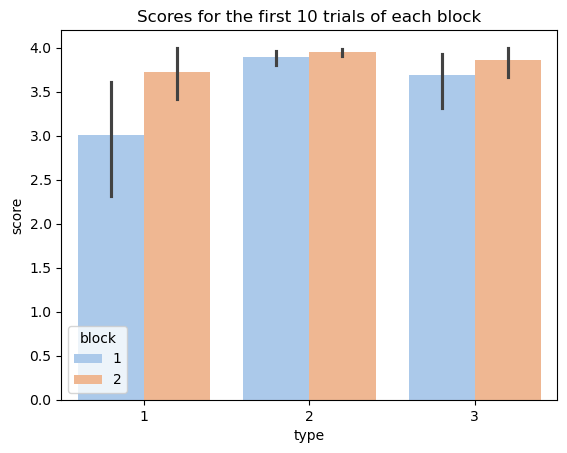

In [17]:
fig = sns.barplot(data = df_fl, x = 'type', y = 'score', hue = 'block', palette= 'pastel')
fig.set_title('Scores for the first 10 trials of each block')
#fig.set_ylim(3,4.5)